In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer
import xgboost as xgb
from sklearn.feature_selection import RFECV

In [2]:
train_df = pd.read_csv('train_validation_set.csv')
test_df = pd.read_csv('test_set.csv')

In [3]:
train_df.columns

Index(['game_id', 'club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Result', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot o

In [4]:
test_df.columns

Index(['game_id', 'club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Result', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot o

In [5]:
independent_variable = ['club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
       'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
       'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
       'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
       '% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y',
       'market_value_in_eur_y']

In [6]:
# 전처리 하고 모델링 하기

In [7]:
# 이상치 제거하기

In [8]:
# 이상치 제거할 컬럼 (이상치는 train set만 제거 진행)

selected_col_for_remove = [
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_x', 'wins_x', 'win_percentage_x', 
       'total_games_vs_opponent_x', 'wins_vs_opponent_x', 'win_percentage_vs_opponent_x', 
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
       'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
       'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
       'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
       '% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y',
       'market_value_in_eur_y', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y', 'win_percentage_vs_opponent_y'
        ]

In [9]:
# z-score를 계산하여 이상치가 있는지 확인하고 이상치를 제외한 데이터 반환
def remove_outliers(df, threshold):
    z_scores = (df - df.mean()) / df.std()
    no_outliers_df = df[(z_scores <= threshold) & (z_scores >= -threshold)]
    return no_outliers_df

# 각 컬럼의 이상치 제거 전/후 히스토그램을 나란히 그리는 함수
def plot_histogram_with_outliers(df, threshold):
    num_columns = len(df.columns)
    fig, axs = plt.subplots(num_columns, 2, figsize=(10, 3*num_columns))  # 크기 조정
    
    # 이상치 제거한 횟수를 저장할 리스트
    outlier_removal_counts = []
    
    for i, col in enumerate(df.columns):
        # 이상치 제거 전 히스토그램
        axs[i, 0].hist(df[col], bins=20, color='blue', alpha=0.7)
        axs[i, 0].set_title(f'Histogram of {col} (Before Removing Outliers)')
        axs[i, 0].set_xlabel('Values')
        axs[i, 0].set_ylabel('Frequency')
        
        # 이상치 제거 후 히스토그램
        no_outliers_df = remove_outliers(df[col], threshold)
        axs[i, 1].hist(no_outliers_df, bins=20, color='green', alpha=0.7)
        axs[i, 1].set_title(f'Histogram of {col} (After Removing Outliers)')
        axs[i, 1].set_xlabel('Values')
        axs[i, 1].set_ylabel('Frequency')
        
        # 이상치 제거한 횟수 저장
        outlier_removal_counts.append(len(df) - len(no_outliers_df))

    # 이상치 제거한 횟수를 출력
    for i, col in enumerate(df.columns):
        print(f'Number of outliers removed in {col}: {outlier_removal_counts[i]}')

    plt.tight_layout()
    plt.show()

In [10]:
train_df[selected_col_for_remove] = train_df[selected_col_for_remove].apply(lambda x: remove_outliers(x, 4))

In [11]:
train_df = train_df.dropna()

In [12]:
# 표준화

In [13]:
# log 스케일링 할 컬럼

In [14]:
skewed_col = ['market_value_in_eur_x', 'market_value_in_eur_y']

In [15]:
train_df[skewed_col] = np.log1p(train_df[skewed_col])

In [16]:
test_df[skewed_col] = np.log1p(test_df[skewed_col])

In [17]:
# minmax scaling하기 
# scaling할 컬럼
col_to_minmax = ['total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
       'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
       'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
       'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
       '% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y']

In [18]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

In [19]:
# 선택한 컬럼에 대해 스케일링 적용
scaler.fit(train_df[col_to_minmax])

MinMaxScaler()

In [20]:
# train_df 스케일링
train_df[col_to_minmax] = scaler.transform(train_df[col_to_minmax])

In [21]:
# test_df 스케일링
test_df[col_to_minmax] = scaler.transform(test_df[col_to_minmax])

In [ ]:
# 성능 보기

In [23]:
independent_variable = ['club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
       'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
       'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
       'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
       '% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y',
       'market_value_in_eur_y']

In [ ]:
# 어제 결과로 그래디언트부스터가 가장 성능이 좋았음

In [24]:
# train_validation 데이터셋 train과 validation으로 나누기
X = train_df[independent_variable]
y = train_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)

# validation 데이터로 예측
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6033254156769596
F1 Score: 0.5579706901204935


In [26]:
# test 데이터로 예측
y_test_pred = gb_model.predict(test_df[independent_variable])
accuracy = accuracy_score(test_df['Result'], y_test_pred)
f1 = f1_score(test_df['Result'], y_test_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5454545454545454
F1 Score: 0.5189490816089282


In [ ]:
# 0.6이나 떨어졌네?

In [27]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# validation 데이터로 예측
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5748218527315915
F1 Score: 0.5138345463900307


In [28]:
# test 데이터로 예측
y_test_pred = rf_model.predict(test_df[independent_variable])
accuracy = accuracy_score(test_df['Result'], y_test_pred)
f1 = f1_score(test_df['Result'], y_test_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5
F1 Score: 0.4616755793226382


In [29]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5748218527315915
F1 Score: 0.5138363178452199


In [30]:
# test 데이터로 예측
y_test_pred = rf_model.predict(test_df[independent_variable])
accuracy = accuracy_score(test_df['Result'], y_test_pred)
f1 = f1_score(test_df['Result'], y_test_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5
F1 Score: 0.4616755793226382


In [31]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=1, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5843230403800475
F1 Score: 0.5216129085140795


In [32]:
# test 데이터로 예측
y_test_pred = xgb_model.predict(test_df[independent_variable])
accuracy = accuracy_score(test_df['Result'], y_test_pred)
f1 = f1_score(test_df['Result'], y_test_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5909090909090909
F1 Score: 0.555023923444976


In [33]:
# 현 모델만 test set 데이터의 예측 증가

In [34]:
def random_forest_add_graph(n_estimators, max_depth=None):
    
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    top_10_features = importance_df.head(10)['Feature']
    print("Top 10 Important Features:")
    print(top_10_features)

    plt.figure(figsize=(6, 7))
    sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

Accuracy: 0.5748218527315915
F1 Score: 0.5138345463900307
Top 10 Important Features:
5                   Table_x
2                    B365HW
6                   Table_y
4                    B365AW
40    market_value_in_eur_x
13         win_percentage_x
70    market_value_in_eur_y
43         win_percentage_y
61      Pass Completion %_y
31      Pass Completion %_x
Name: Feature, dtype: object


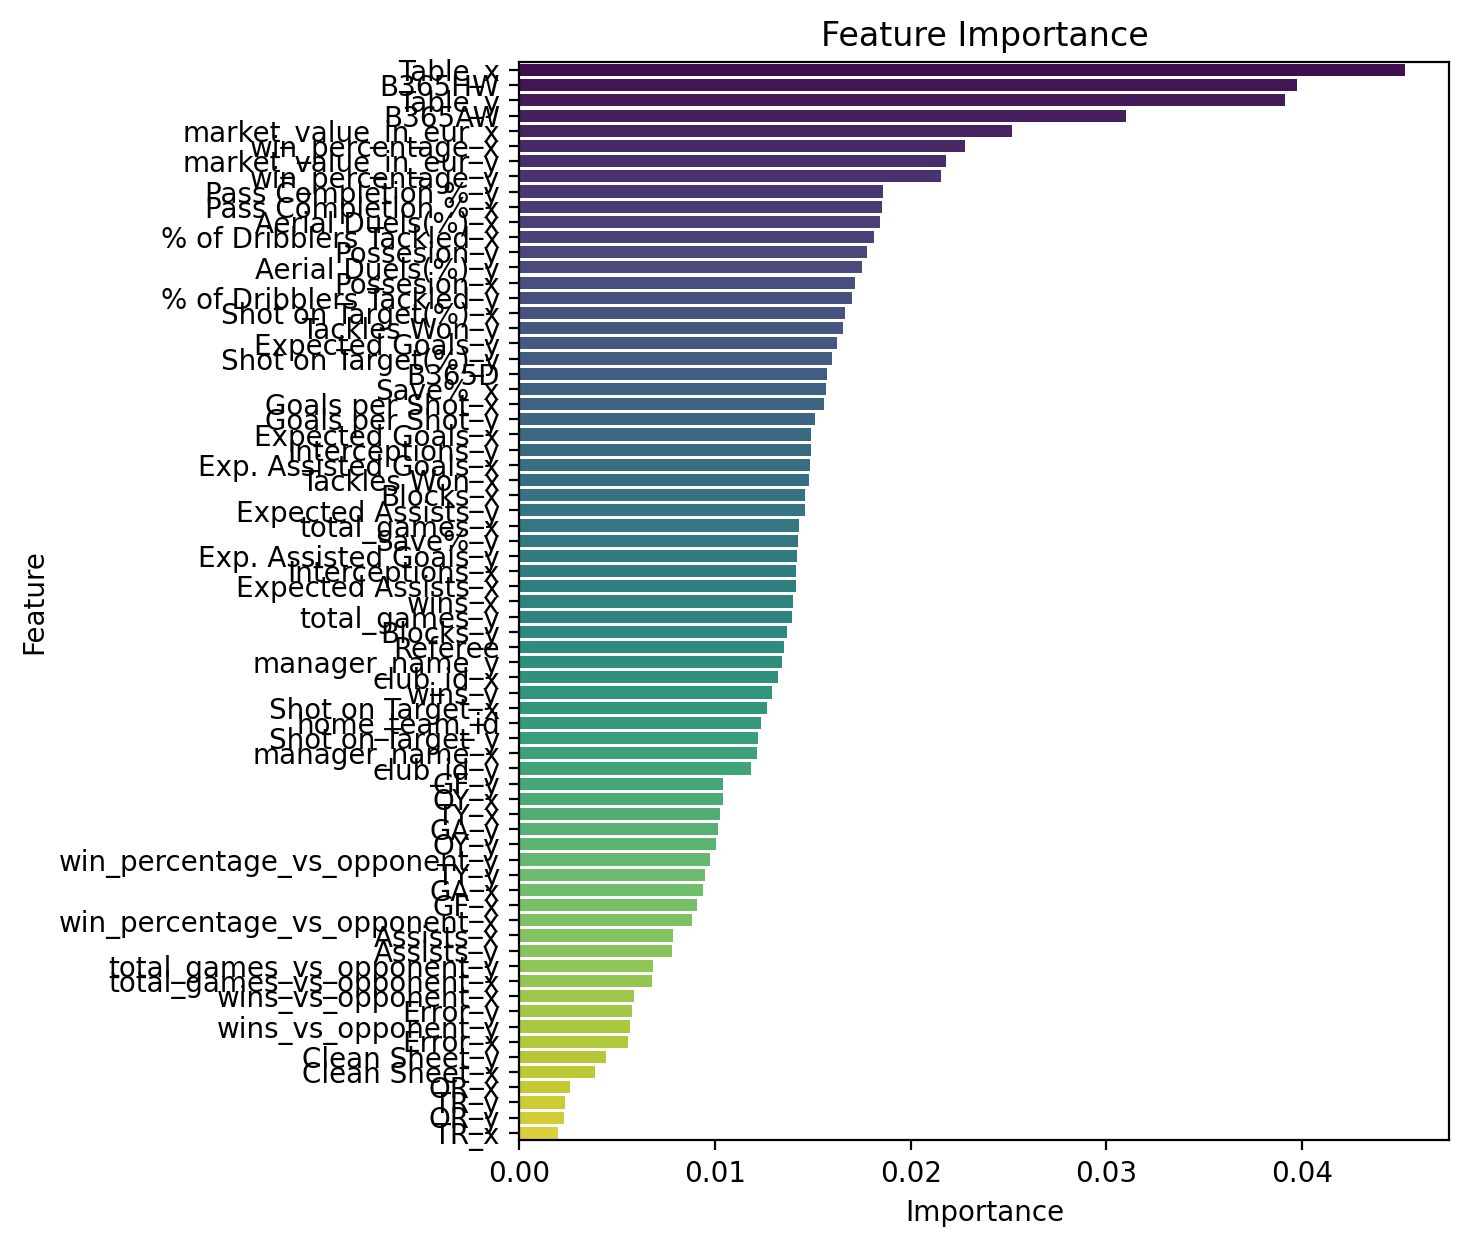

In [35]:
random_forest_add_graph(300)

In [36]:
fi_selected_features = [
    'Table_x', 'B365HW', 'Table_y', 'B365AW', 'market_value_in_eur_x', 'win_percentage_x', 
    'market_value_in_eur_y', 'win_percentage_y', 'Pass Completion %_y', 'Pass Completion %_x'
]

In [37]:
# 선택된 독립변수로 train_validation 데이터셋 나누기

X = train_df[fi_selected_features]
y = train_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5866983372921615
F1 Score: 0.5534358968541013


In [42]:
# test 데이터로 예측
y_test_pred = rf_model.predict(test_df[fi_selected_features])
accuracy = accuracy_score(test_df['Result'], y_test_pred)
f1 = f1_score(test_df['Result'], y_test_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5454545454545454
F1 Score: 0.5094422485726834


In [ ]:
# XGboost 전체 컬럼 다 포함했을 때 제일 좋았던 조합

In [ ]:
# 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100

In [43]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=1, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5843230403800475
F1 Score: 0.5117089212785256


In [44]:
def XGB_add_graph(n_estimators, max_depth=None, learning_rate=None):
    
    xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    importances = xgb_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    top_10_features = importance_df.head(10)['Feature']
    print("Top 10 Important Features:")
    print(top_10_features)

    plt.figure(figsize=(6, 7))
    sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

Accuracy: 0.5843230403800475
F1 Score: 0.5117089212785256
Top 10 Important Features:
1                   B365HW
3                   B365AW
0                  Table_x
2                  Table_y
4    market_value_in_eur_x
5         win_percentage_x
7         win_percentage_y
9      Pass Completion %_x
8      Pass Completion %_y
6    market_value_in_eur_y
Name: Feature, dtype: object


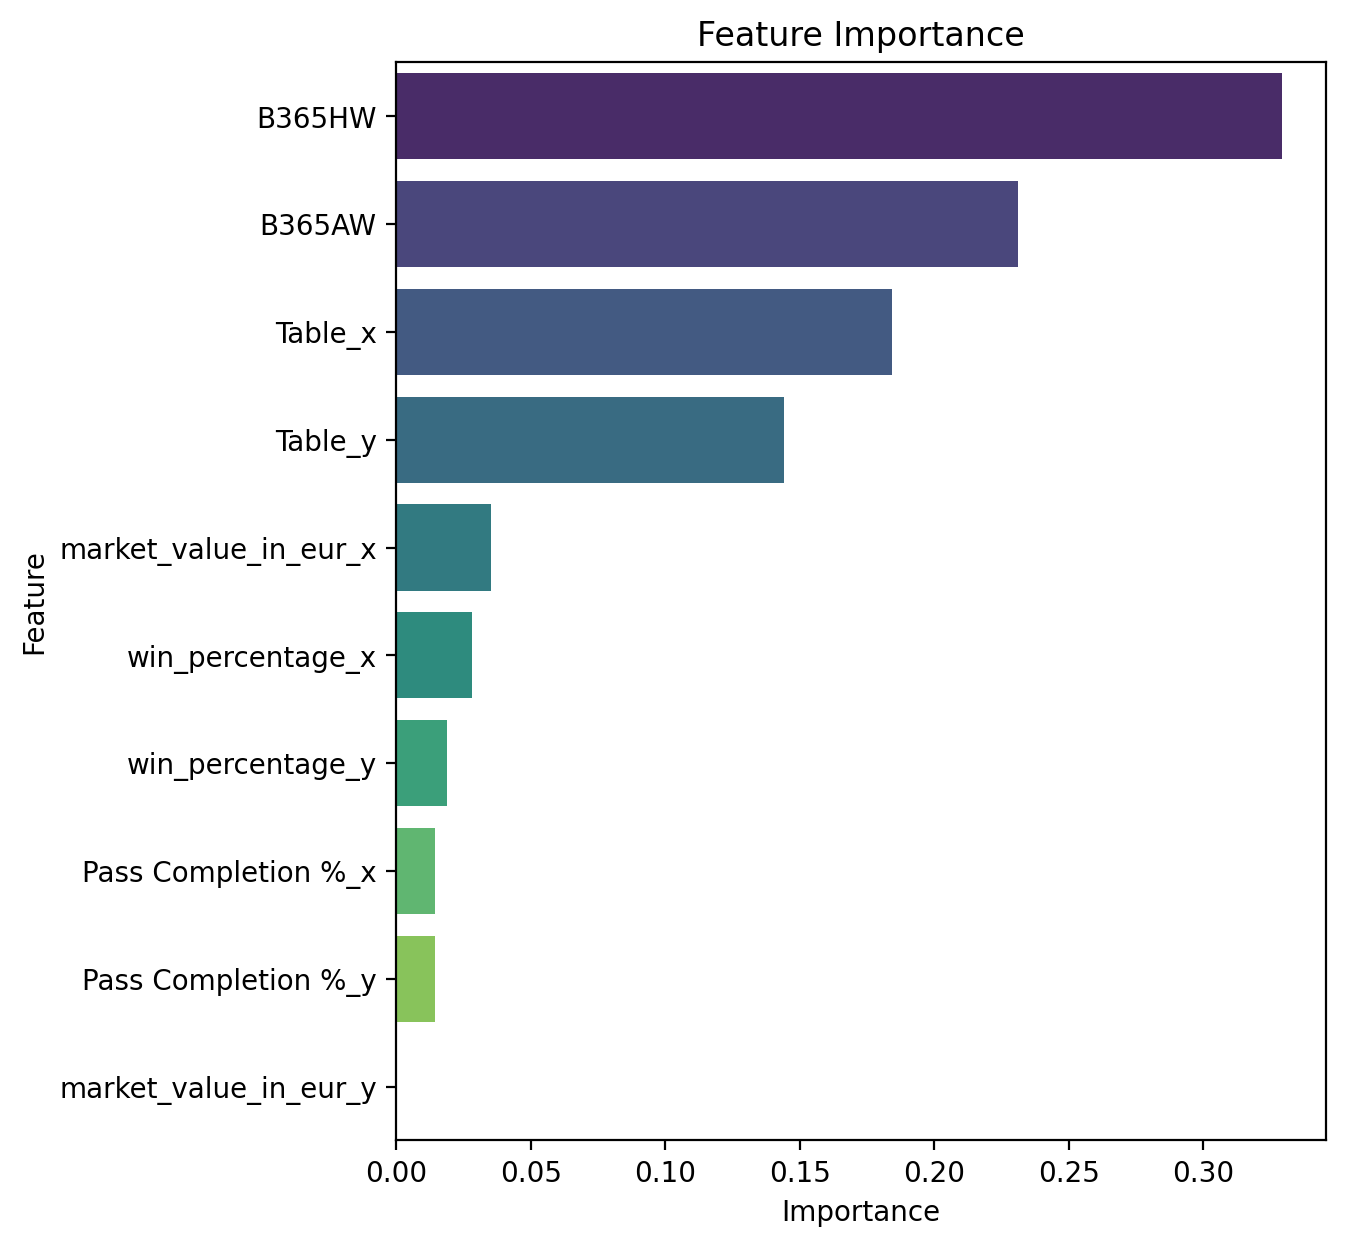

In [45]:
XGB_add_graph(100, 1, 0.1)

In [46]:
fi_selected_features = [
    'B365HW', 'B365AW', 'Table_x', 'Table_y', 'market_value_in_eur_x', 'win_percentage_x', 
    'win_percentage_y', 'Pass Completion %_x', 'Pass Completion %_y', 'market_value_in_eur_y'
]

In [47]:
# 선택된 독립변수로 데이터셋 나누기

X = train_df[fi_selected_features]
y = train_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=1, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5843230403800475
F1 Score: 0.5117089212785256


In [69]:
# 모델 정의
model = xgb.XGBClassifier(random_state=42)

# 그리드 서치를 위한 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
    'learning_rate' : [0.05, 0.1, 0.2]
}

# F1-score를 위한 scorer 함수 생성
f1_scorer = make_scorer(f1_score, average='macro')

# 그리드 서치 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'f1_macro': f1_scorer}, refit='accuracy', verbose=1, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X, y)

# 각 하이퍼파라미터 조합에 대한 결과 출력
print("Grid Search Results:")
for params, mean_acc, std_acc, mean_f1, std_f1 in zip(grid_search.cv_results_['params'],
                                                        grid_search.cv_results_['mean_test_accuracy'],
                                                        grid_search.cv_results_['std_test_accuracy'],
                                                        grid_search.cv_results_['mean_test_f1_macro'],
                                                        grid_search.cv_results_['std_test_f1_macro']):
    print("Parameters:", params)
    print("Mean Accuracy:", mean_acc)
    print("Standard Deviation of Accuracy:", std_acc)
    print("Mean F1-score:", mean_f1)
    print("Standard Deviation of F1-score:", std_f1)

# 최적의 하이퍼파라미터 및 모델 평가 결과 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Grid Search Results:
Parameters: {'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 100}
Mean Accuracy: 0.5206888361045131
Standard Deviation of Accuracy: 0.02827880358184059
Mean F1-score: 0.4326491152111295
Standard Deviation of F1-score: 0.017854255853821346
Parameters: {'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 200}
Mean Accuracy: 0.5011729442370773
Standard Deviation of Accuracy: 0.029982923547605168
Mean F1-score: 0.4261153329640176
Standard Deviation of F1-score: 0.025997510233805084
Parameters: {'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 300}
Mean Accuracy: 0.4911819929872186
Standard Deviation of Accuracy: 0.03650553966613284
Mean F1-score: 0.4245136490469033
Standard Deviation of F1-score: 0.03502573367121366
Parameters: {'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 400}
Mean Accuracy: 0.4873713380839272
Standard Deviation of Accuracy: 0.03194814182109713
Mean F1

In [64]:
# feature importance로 추린 10개 컬럼 + xgboost

# Best parameters found:  {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}
# Best cross-validation accuracy: 0.59

In [49]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=1, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5890736342042755
F1 Score: 0.5151643955494436


In [50]:
# test 데이터로 예측
y_test_pred = xgb_model.predict(test_df[fi_selected_features])
accuracy = accuracy_score(test_df['Result'], y_test_pred)
f1 = f1_score(test_df['Result'], y_test_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5454545454545454
F1 Score: 0.5094422485726834


In [51]:
# 성능 좋은 모델 다시 확인

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=1, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5843230403800475
F1 Score: 0.5117089212785256


In [52]:
# test 데이터로 예측
y_test_pred = xgb_model.predict(test_df[fi_selected_features])
accuracy = accuracy_score(test_df['Result'], y_test_pred)
f1 = f1_score(test_df['Result'], y_test_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5909090909090909
F1 Score: 0.555023923444976


In [53]:
# 현재까지는 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100 이 가장 좋은 성능을 보임